In [69]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
from collections import Counter

### Code 4.1

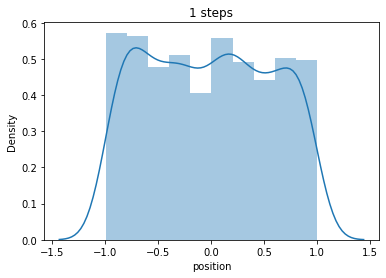

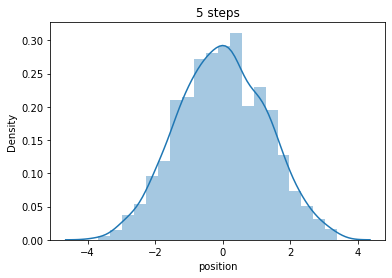

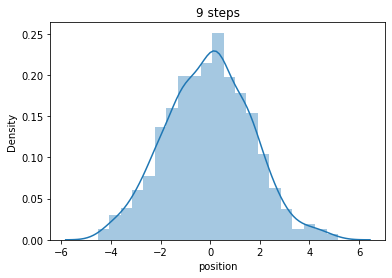

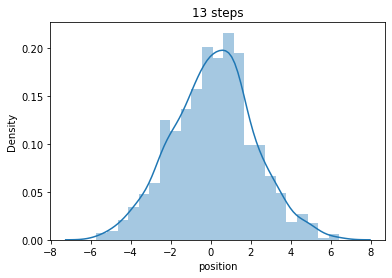

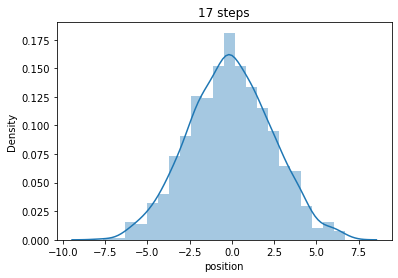

In [21]:
np.random.seed(42)
for i in range(1,18,4):
    pos = np.sum(np.random.uniform(low = -1, high = 1,size = (i,1000)), axis= 0)
    sns.distplot(pos)
    plt.xlabel('position')
    plt.ylabel('Density')
    plt.title(f'{i} steps')
    plt.show()

### Code 4.2 & 4.3

small deviates multipled together form a normal distribution. This is due to multiplying small numbers together are approximately the same as addition

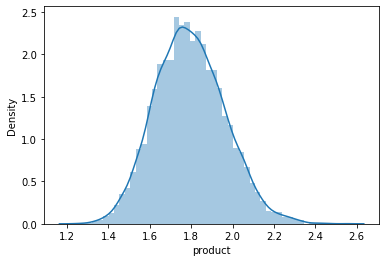

In [32]:
np.random.seed(42)
growth = np.prod(1 + np.random.uniform(0,.1, size = (12,10000)), axis = 0)
sns.distplot(growth,norm_hist=True)
plt.xlabel('product')
plt.ylabel('Density')
plt.show()

### Code 4.4

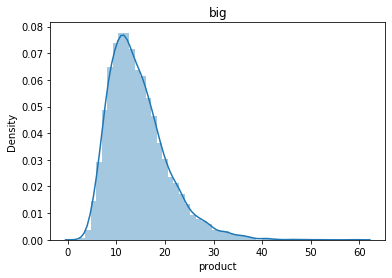

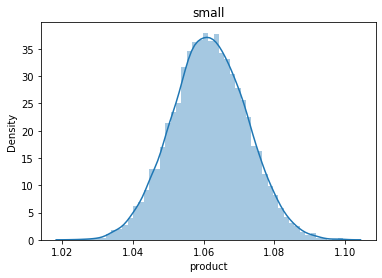

In [37]:
big = np.prod(1 + np.random.uniform(0,.5, size = (12,10000)), axis = 0)
small = np.prod(1 + np.random.uniform(0,.01, size = (12,10000)), axis = 0)
plt.figure()
sns.distplot(big,norm_hist=False)
plt.xlabel('product')
plt.ylabel('Density')
plt.title('big')
plt.figure()
sns.distplot(small,norm_hist=False)
plt.xlabel('product')
plt.ylabel('Density')
plt.title('small')
plt.show()

### Code 4.5

Large deviates which are multipled together tend to produce gaussians on the log scale
Why? because adding logs is equivalent to multiplying original numbers

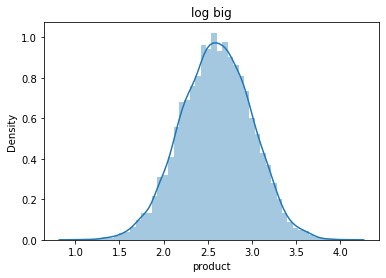

In [42]:
np.random.seed(42)
log_big = np.log(np.prod(1 + np.random.uniform(0,.5, size = (12,10000)), axis = 0))
sns.distplot(log_big,norm_hist=False)
plt.xlabel('product')
plt.ylabel('Density')
plt.title('log big')
plt.show()

### Code 4.6

In [62]:
w = 6
n = 9
p_grid = np.linspace(0,1,100)
posterior = stats.binom.pmf(k = w,n = n, p= p_grid)*stats.uniform.pdf(p_grid, 0 ,1) #likelihood * prior
posterior = posterior/np.sum(posterior)

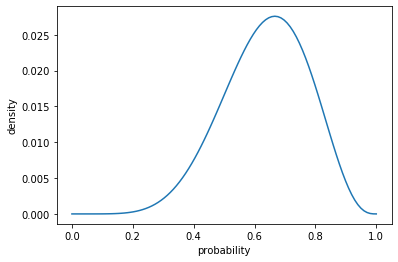

In [68]:
plt.plot(p_grid, posterior)
plt.xlabel('probability')
plt.ylabel('density')
plt.show()

### Code 4.7 - 4.10

In [92]:
# 4.7
d = pd.read_csv('.\data\Howell1.csv', sep = ";")
d.head()

# 4.8
print(d.info())

# 4.9
d['height'].head()

#4.10
d2 = d.query('age >= 18')
print(f'the length of d2 is {len(d2)}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
height    544 non-null float64
weight    544 non-null float64
age       544 non-null float64
male      544 non-null int64
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
None
the length of d2 is 352


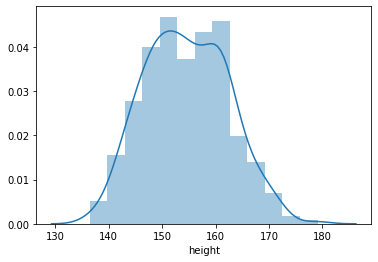

In [94]:
# plot the height of people over the age of 18
# it looks rather gaussian in shape. This maybe because height is the sum of man small growth factors
# as we said previously, distribution of sums tends to converge to gaussian dist
sns.distplot(d2['height'])

### Code 4.11